In [4]:
# Directories
import os
os.chdir(r"E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Academics\1_PAPER\2_Analysis")
print(os.getcwd())


E:\academy\OneDrive - IIT Delhi\3. IIT DELHI\2. Academics\1_PAPER\2_Analysis


In [2]:
#Array packages
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc4

from scipy.stats import kendalltau
import pymannkendall as mk

#plots
import matplotlib.pyplot as plt
import rioxarray as rio
import geopandas as gpd
from shapely.geometry import mapping
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator

#Progress meter
from dask.diagnostics import ProgressBar
from tqdm import tqdm

# Directories
import os
import glob
import dask
#import h5netcdf
import scipy


C:\Users\sstar\anaconda3\envs\imed\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [26]:
ds.data_vars

Data variables:
    Swnet_tavg        (region, season, year) float32 12kB dask.array<chunksize=(18, 4, 42), meta=np.ndarray>
    Lwnet_tavg        (region, season, year) float32 12kB dask.array<chunksize=(18, 4, 42), meta=np.ndarray>
    Qle_tavg          (region, season, year) float32 12kB dask.array<chunksize=(18, 4, 42), meta=np.ndarray>
    Qh_tavg           (region, season, year) float32 12kB dask.array<chunksize=(18, 4, 42), meta=np.ndarray>
    Qg_tavg           (region, season, year) float32 12kB dask.array<chunksize=(18, 4, 42), meta=np.ndarray>
    Snowf_tavg        (region, season, year) float32 12kB dask.array<chunksize=(18, 4, 42), meta=np.ndarray>
    Evap_tavg         (region, season, year) float64 24kB dask.array<chunksize=(18, 4, 42), meta=np.ndarray>
    Qs_tavg           (region, season, year) float64 24kB dask.array<chunksize=(18, 4, 42), meta=np.ndarray>
    Qsb_tavg          (region, season, year) float64 24kB dask.array<chunksize=(18, 4, 42), meta=np.ndarray>
   

C:\Users\sstar\AppData\Local\Temp\ipykernel_8148\965747520.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 3)  # Choose a colormap and number of colors


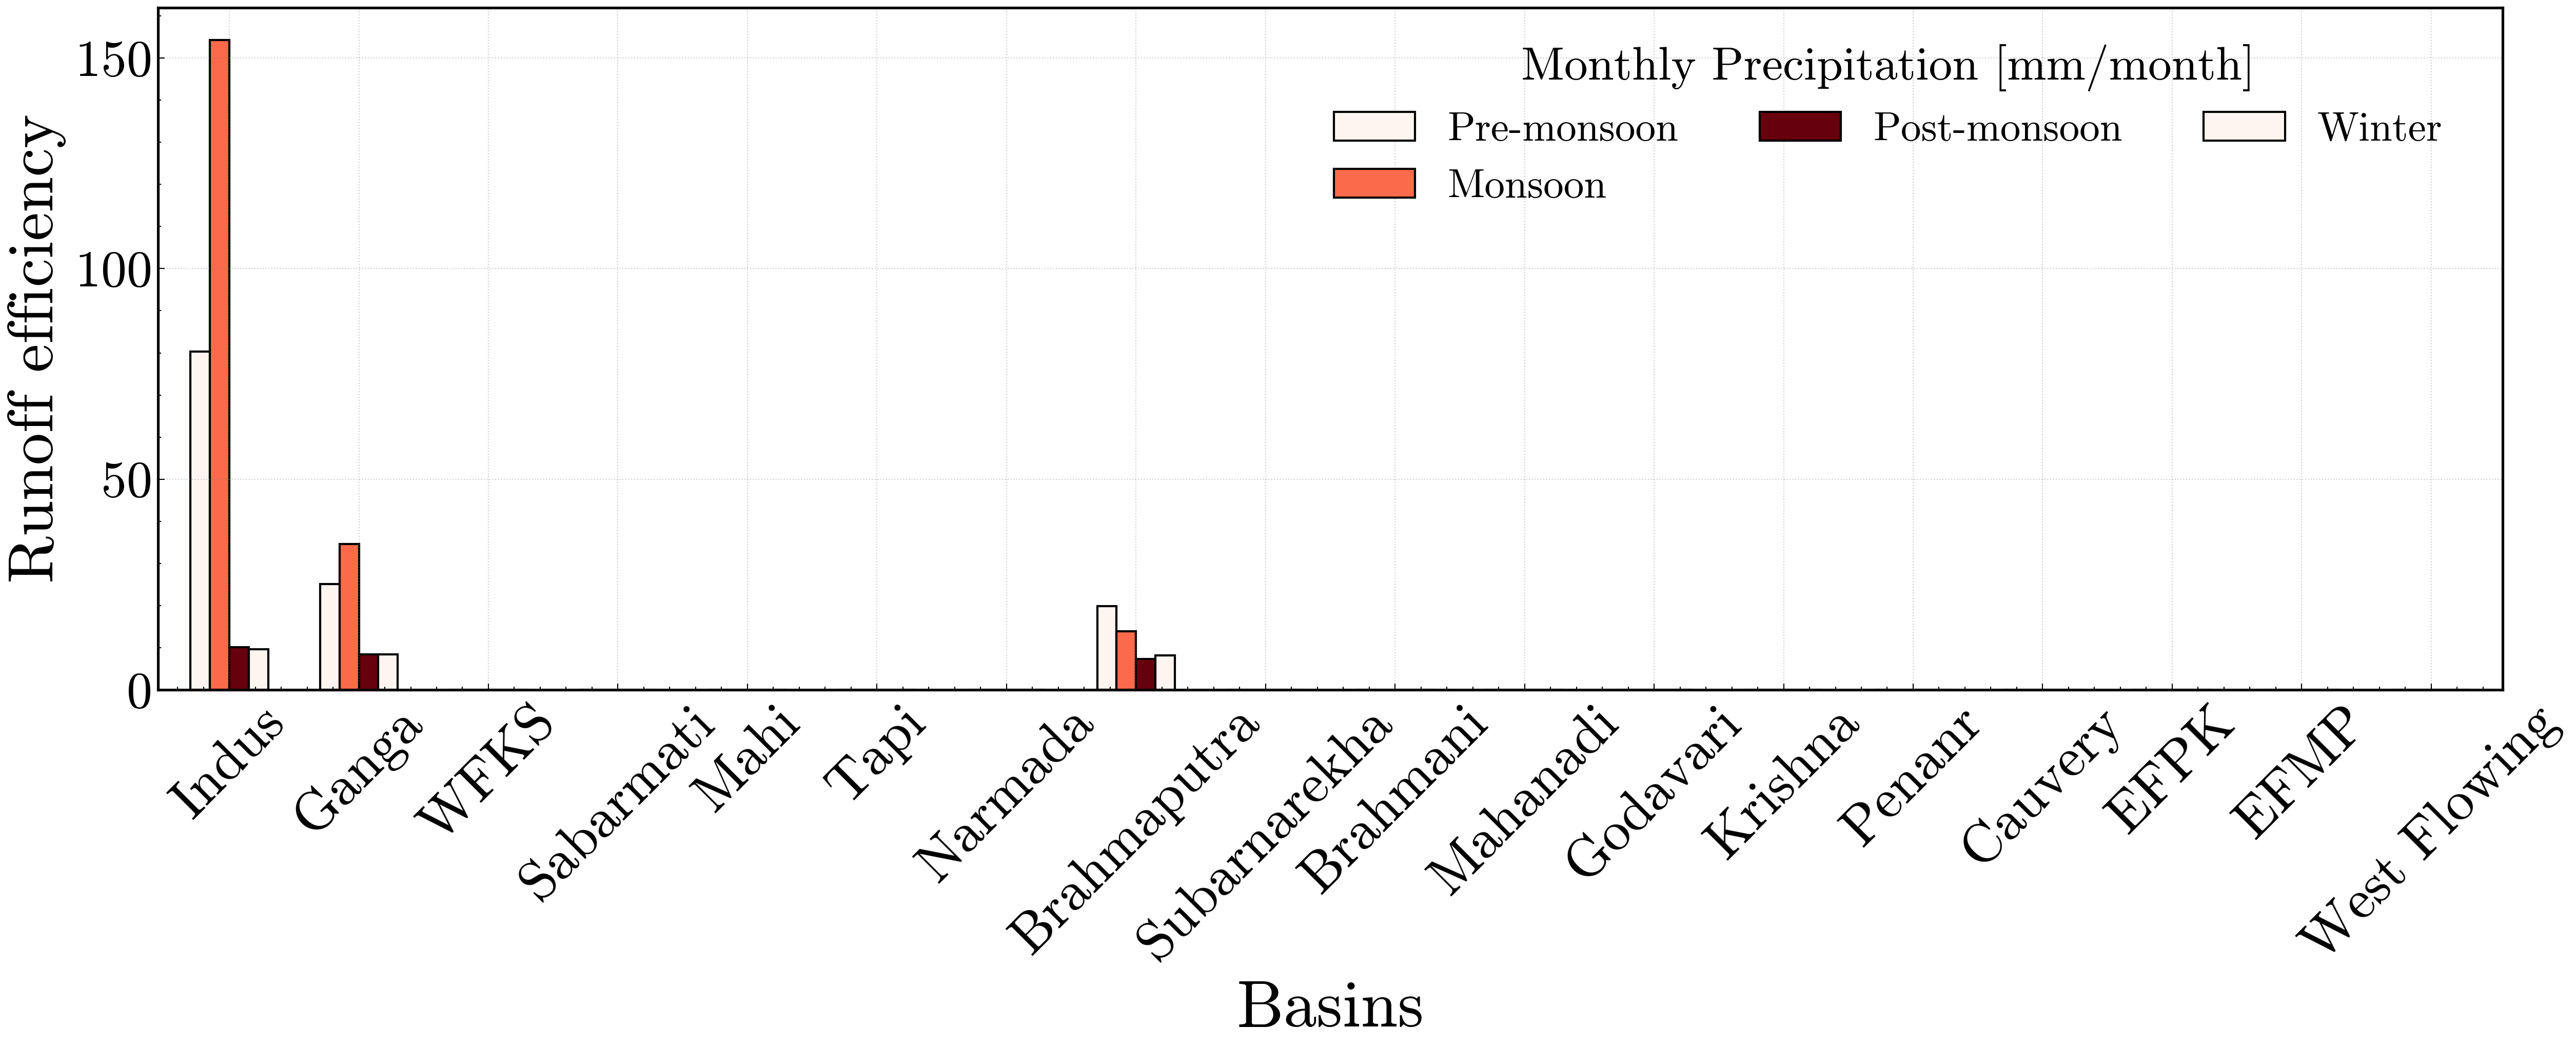

In [38]:
import scienceplots
model=["LIS_MERRA2","LIS_IMD","LIS_CHIRPS","LIS_ERA5","LIS_IMDc","LIS_IMDcnew"]
var=['TotalPrecip_tavg','Evap_tavg','Qs_tavg','RE','RE_cleaned']
mdl=4

ds = xr.open_mfdataset(f'DATA_p/LIS/{model[mdl]}/{model[mdl]}_reg_ssn.nc',engine='netcdf4', parallel=True,chunks={'time': 'auto'})
basin=ds_RM.region.values

ssn = ['Pre-monsoon','Monsoon','Post-monsoon','Winter']
df = pd.DataFrame(columns=data,index=basin)
df = df.apply(pd.to_numeric, errors='coerce')

ds1=ds.mean(dim='SoilMoist_profiles')
#ds1=ds1['TWS_tavg']/(60*60*24*30)  #we multplied all the variables to converted to mm/month. But SM unit is different, m3/m3, it shouldn't be treated like that
ds1=ds1['Qsm_tavg']  #we multplied all the variables to converted to mm/month. But SM unit is different, m3/m3, it shouldn't be treated like that
  
# SoilMoist_tavg , Snowf_tavg, WaterTableD_tavg,Qsm_tavg 

for i, Reg in enumerate(basin):

    df.iloc[i,:] = [ds1.isel(region=i, season=j).mean().compute().values for j in range(4)]


    


#Box plot of values
# Plotting bar plot with increased size
fig, ax = plt.subplots(figsize=(17, 7),dpi=300)  # Increased size

cmap = plt.cm.get_cmap('Reds', 3)  # Choose a colormap and number of colors
colors = [cmap(i) for i in range(3)] 
df.plot.bar(rot=45, ax=ax,color= colors,width=0.6,edgecolor='black')

[x.set_linewidth(1.25) for x in ax.spines.values()]
ax.grid(True, color= 'grey', alpha=0.4, linestyle='dotted')


#ax.set_title('Bar Plot of RE Values by Basin',fontsize=17)
ax.set_xlabel('Basins',fontsize=31)
ax.set_ylabel('Runoff efficiency',fontsize=30)
ax.yaxis.set_tick_params(which='both', bottom=True, top=False,labelsize=24) 
ax.xaxis.set_tick_params(which='both', left=True, right=False,labelsize=26)

ax.legend(loc='upper right', bbox_to_anchor=(0.99, 1),title='Monthly Precipitation [mm/month]',title_fontsize=22,ncol=3,fontsize=19)

plt.tight_layout()


In [72]:
## GAnga water balance
ds_ganga=ds.isel(region=1, season=1).compute()

ds_ganga['TotalPrecip_tavg'].mean().values-ds_ganga['Evap_tavg'].mean().values-ds_ganga['Qs_tavg'].mean().values-ds_ganga['Qsb_tavg'].mean().values

31.695248596066897

array(34.548702, dtype=float32)